## Data Overview

This dataset contains 25 variables:

### Variables:

- **ID**: ID of each client.

- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit).

- **SEX**: Gender (1 = male, 2 = female).

- **EDUCATION**: Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown).

- **MARRIAGE**: Marital status (1 = married, 2 = single, 3 = others).

- **AGE**: Age in years.

- **PAY_0**: Repayment status in September, 2005. The scale is as follows:
  - **-1** = pay duly
  - **1** = payment delay for one month
  - **2** = payment delay for two months
  - **3** = payment delay for three months
  - **4** = payment delay for four months
  - **5** = payment delay for five months
  - **6** = payment delay for six months
  - **7** = payment delay for seven months
  - **8** = payment delay for eight months
  - **9** = payment delay for nine months and above.

- **PAY_2**: Repayment status in August, 2005 (scale same as above).

- **PAY_3**: Repayment status in July, 2005 (scale same as above).

- **PAY_4**: Repayment status in June, 2005 (scale same as above).

- **PAY_5**: Repayment status in May, 2005 (scale same as above).

- **PAY_6**: Repayment status in April, 2005 (scale same as above).

- **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollars).

- **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollars).

- **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollars).

- **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollars).

- **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollars).

- **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollars).

- **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollars).

- **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollars).

- **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollars).

- **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollars).

- **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollars).

- **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollars).

- **default.payment.next.month**: Default payment (1 = yes, 0 = no).


## Importing Necessary Libraries

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

## Data Loading

In [199]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [200]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


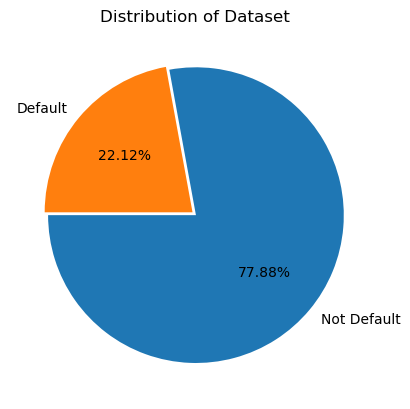

In [201]:
plt.title('Distribution of Dataset')
plt.pie(df['default.payment.next.month'].value_counts(), labels=['Not Default', 'Default'], autopct='%0.2f%%', explode=[0.01,0.02], startangle=180)
plt.show()

## Data Preprocessing

In [202]:
df.shape

(30000, 25)

In [203]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [204]:
df.duplicated().sum()

0

No null and duplicate values 

In [205]:
df.rename(columns={'default.payment.next.month': 'defaulter'}, inplace=True)

In [206]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'defaulter'],
      dtype='object')

In [207]:
df1 = df.copy()

In [208]:
df1.drop('ID', axis=1, inplace=True)

In [209]:
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulter
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Education and Marriage are nominal columns so performing one-hot encoding 

In [210]:
df_mar = pd.get_dummies(df['MARRIAGE'], prefix='Mar', dtype=int)
df_mar

,Mar_0,Mar_1,Mar_2,Mar_3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
29995,0,1,0,0
29996,0,0,1,0
29997,0,0,1,0
29998,0,1,0,0


In [211]:
df_edu = pd.get_dummies(df['EDUCATION'], prefix='Edu', dtype=int)
df_edu

,Edu_0,Edu_1,Edu_2,Edu_3,Edu_4,Edu_5,Edu_6
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
29995,0,0,0,1,0,0,0
29996,0,0,0,1,0,0,0
29997,0,0,1,0,0,0,0
29998,0,0,0,1,0,0,0


In [212]:
df1 = pd.concat([df1,df_mar,df_edu],axis=1)

In [213]:
df1.drop(['EDUCATION','MARRIAGE'], axis=1, inplace=True)

In [214]:
df1.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,Mar_1,Mar_2,Mar_3,Edu_0,Edu_1,Edu_2,Edu_3,Edu_4,Edu_5,Edu_6
0,20000.0,2,24,2,2,-1,-1,-2,-2,3913.0,...,1,0,0,0,0,1,0,0,0,0
1,120000.0,2,26,-1,2,0,0,0,2,2682.0,...,0,1,0,0,0,1,0,0,0,0
2,90000.0,2,34,0,0,0,0,0,0,29239.0,...,0,1,0,0,0,1,0,0,0,0
3,50000.0,2,37,0,0,0,0,0,0,46990.0,...,1,0,0,0,0,1,0,0,0,0
4,50000.0,1,57,-1,0,-1,0,0,0,8617.0,...,1,0,0,0,0,1,0,0,0,0


In [215]:
df1.describe()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,Mar_1,Mar_2,Mar_3,Edu_0,Edu_1,Edu_2,Edu_3,Edu_4,Edu_5,Edu_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,0.455300,0.532133,0.010767,0.000467,0.352833,0.467667,0.163900,0.004100,0.009333,0.001700
std,129747.661567,0.489129,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,0.498006,0.498975,0.103204,0.021598,0.477859,0.498962,0.370191,0.063901,0.096159,0.041197
min,10000.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,2.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Visualizations

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

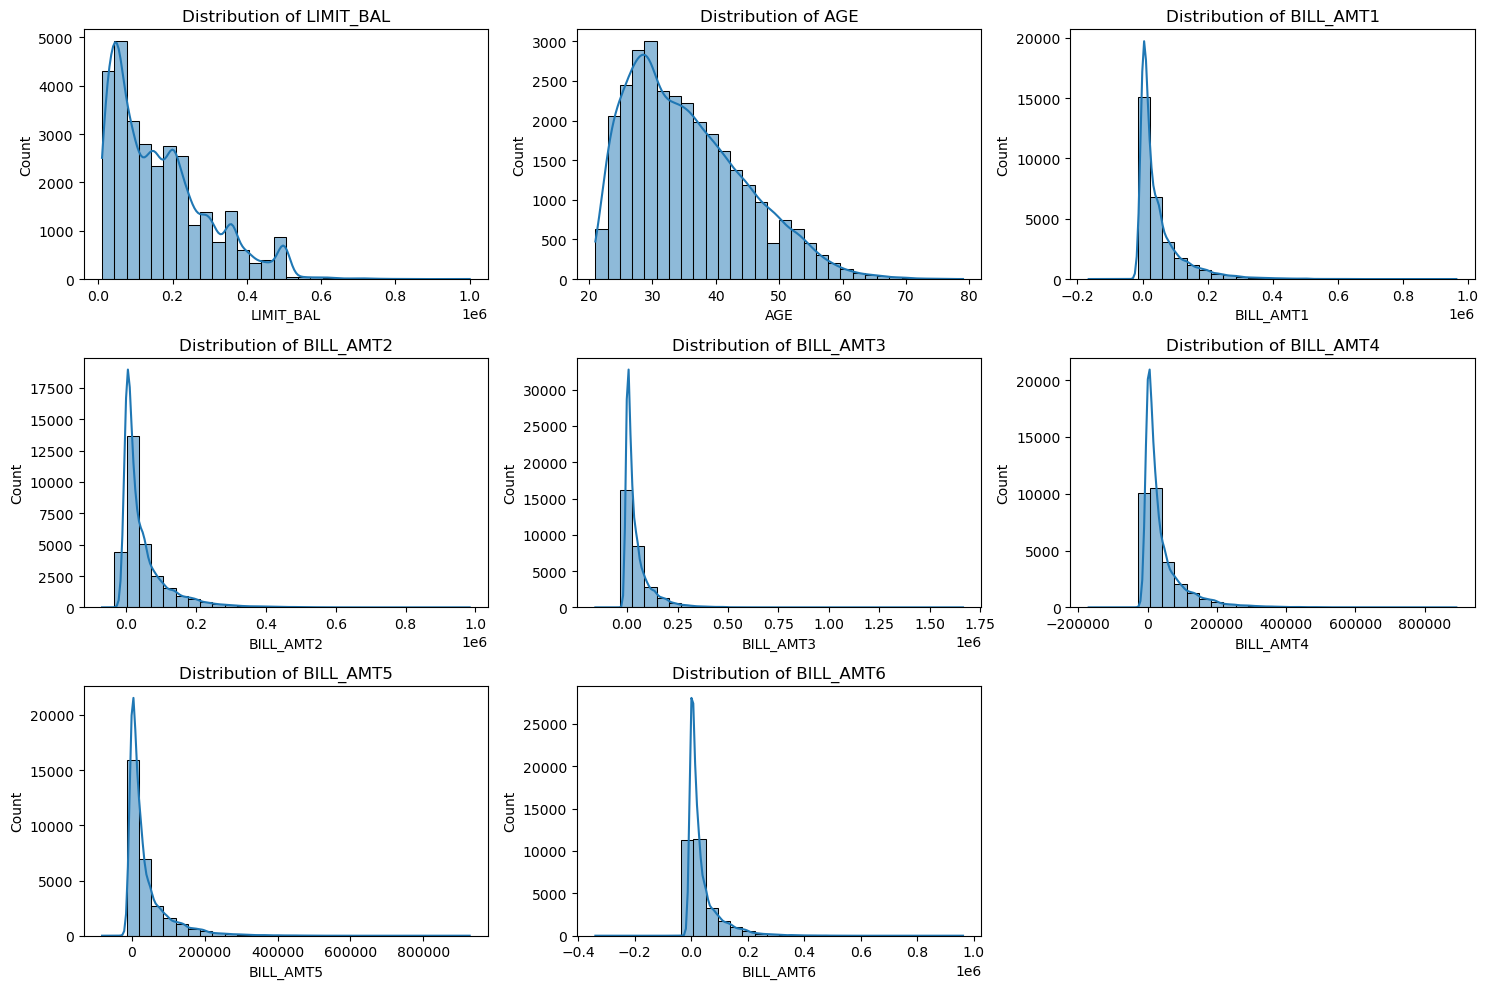

In [216]:
numerical_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


In [217]:
categ_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
len(categ_cols)

9

In [218]:
pay_labels = ['pay duly', '1', '2', '3', '4', '5', '6', '7', '8',
              '9 and above']

In [219]:
def generate_ticks(n):
    ticks =[]
    for i in range(n):
        ticks.append(i)
    return ticks

In [220]:
generate_ticks(3)

[0, 1, 2]

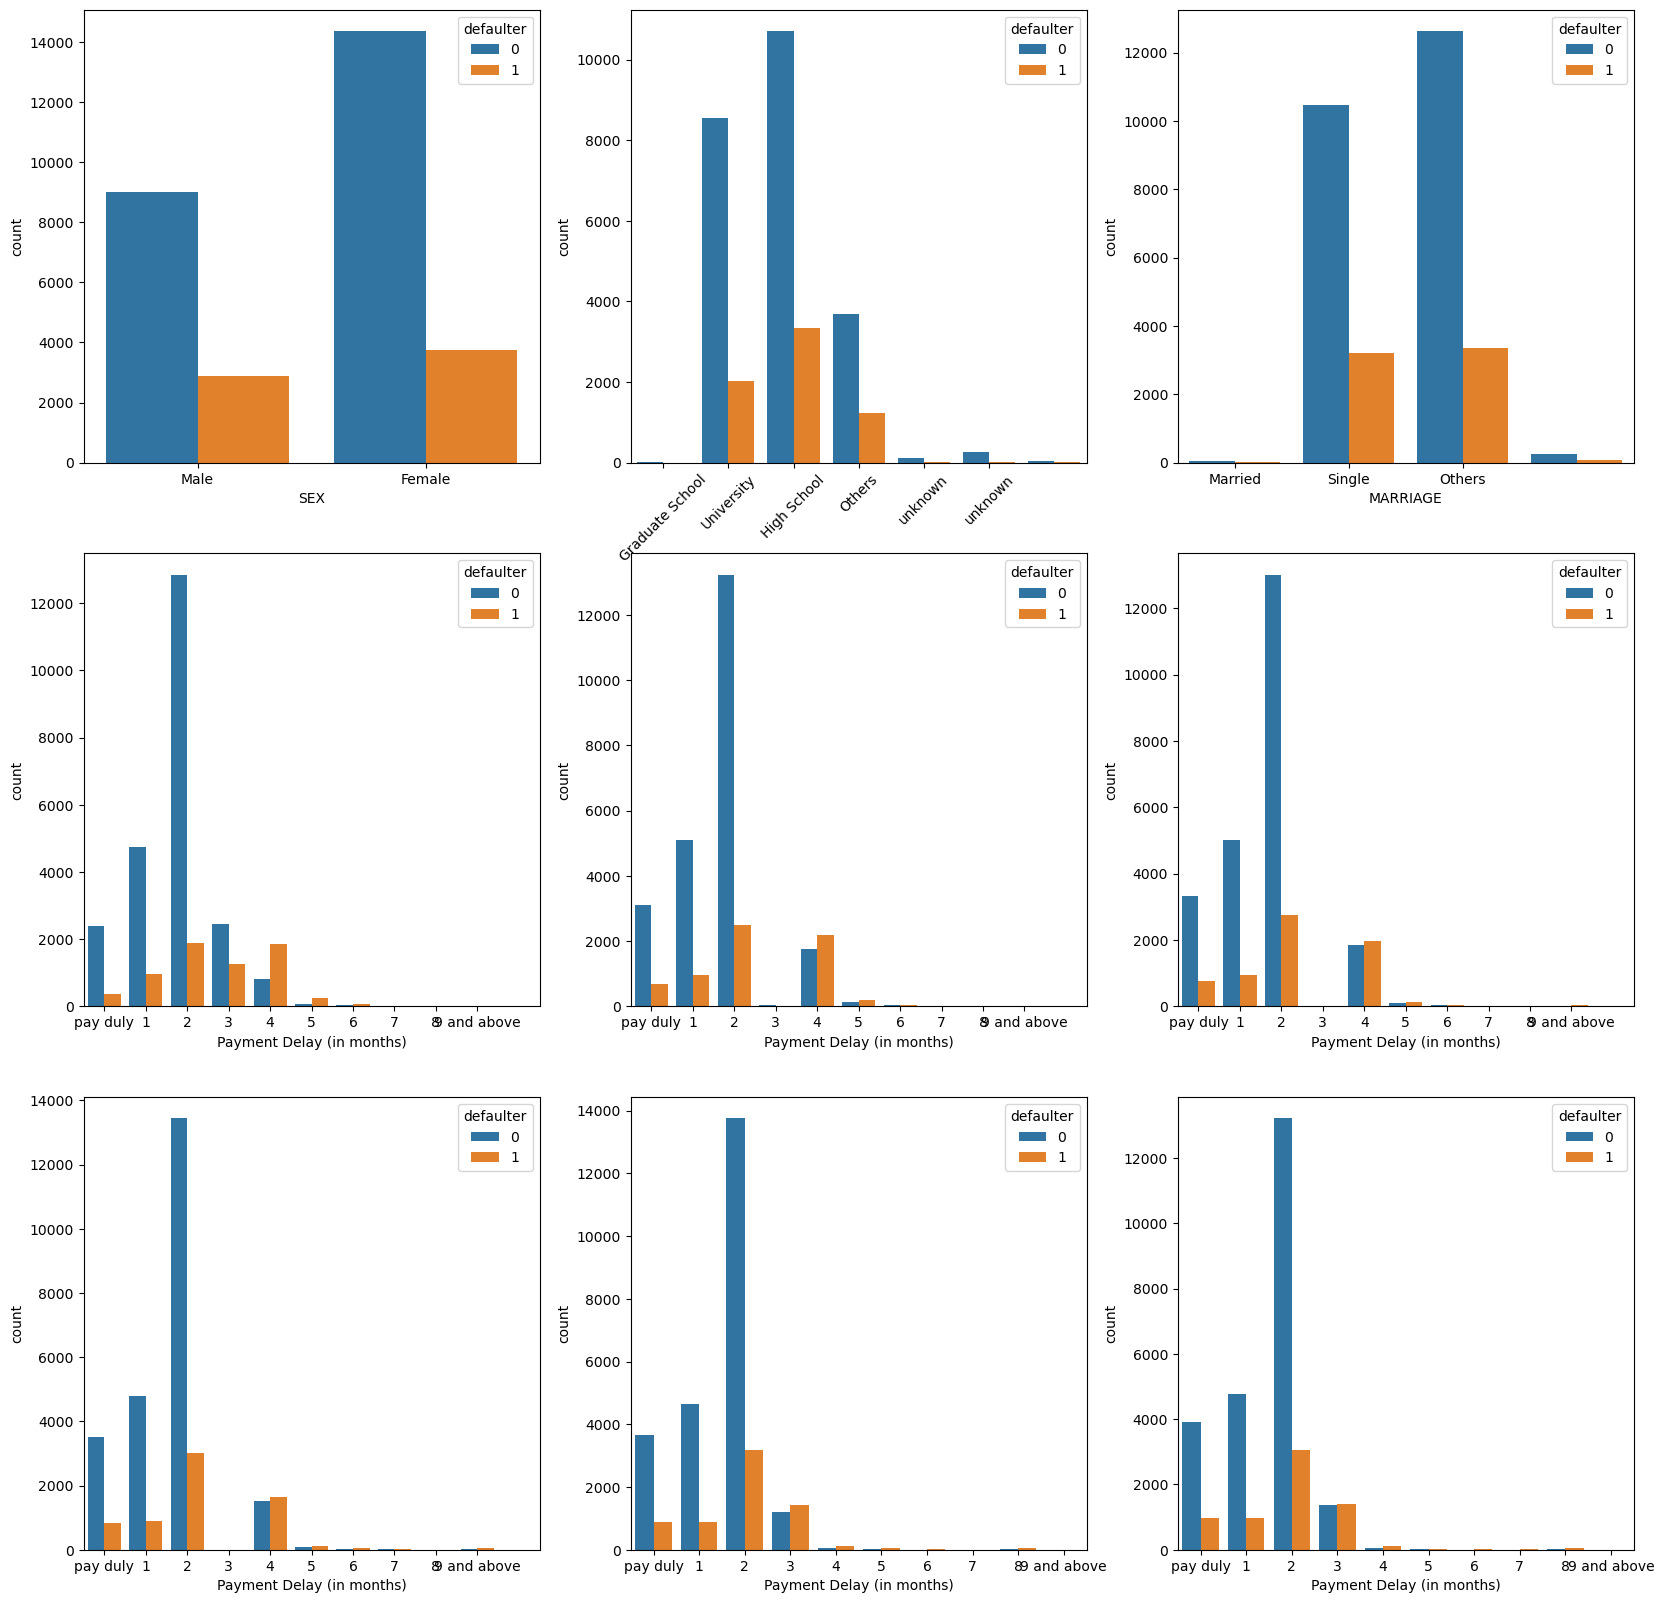

In [221]:
plt.figure(figsize=(20,20))
labels=[['Male', 'Female'], ['Graduate School', 'University', 'High School', 'Others', 'unknown', 'unknown'], 
        ['Married', 'Single', 'Others'], pay_labels, pay_labels, pay_labels, pay_labels, pay_labels, pay_labels]
i=1
for col in categ_cols:
    plt.subplot(3,3,i)
    sns.countplot(data=df, x= col, hue='defaulter')
    plt.xticks(ticks=generate_ticks(len(labels[i-1])), labels=labels[i-1])
    if i>3:
        plt.xlabel('Payment Delay (in months)')
    if i==2:
        plt.xticks(rotation=45)
    i+=1

<Axes: >

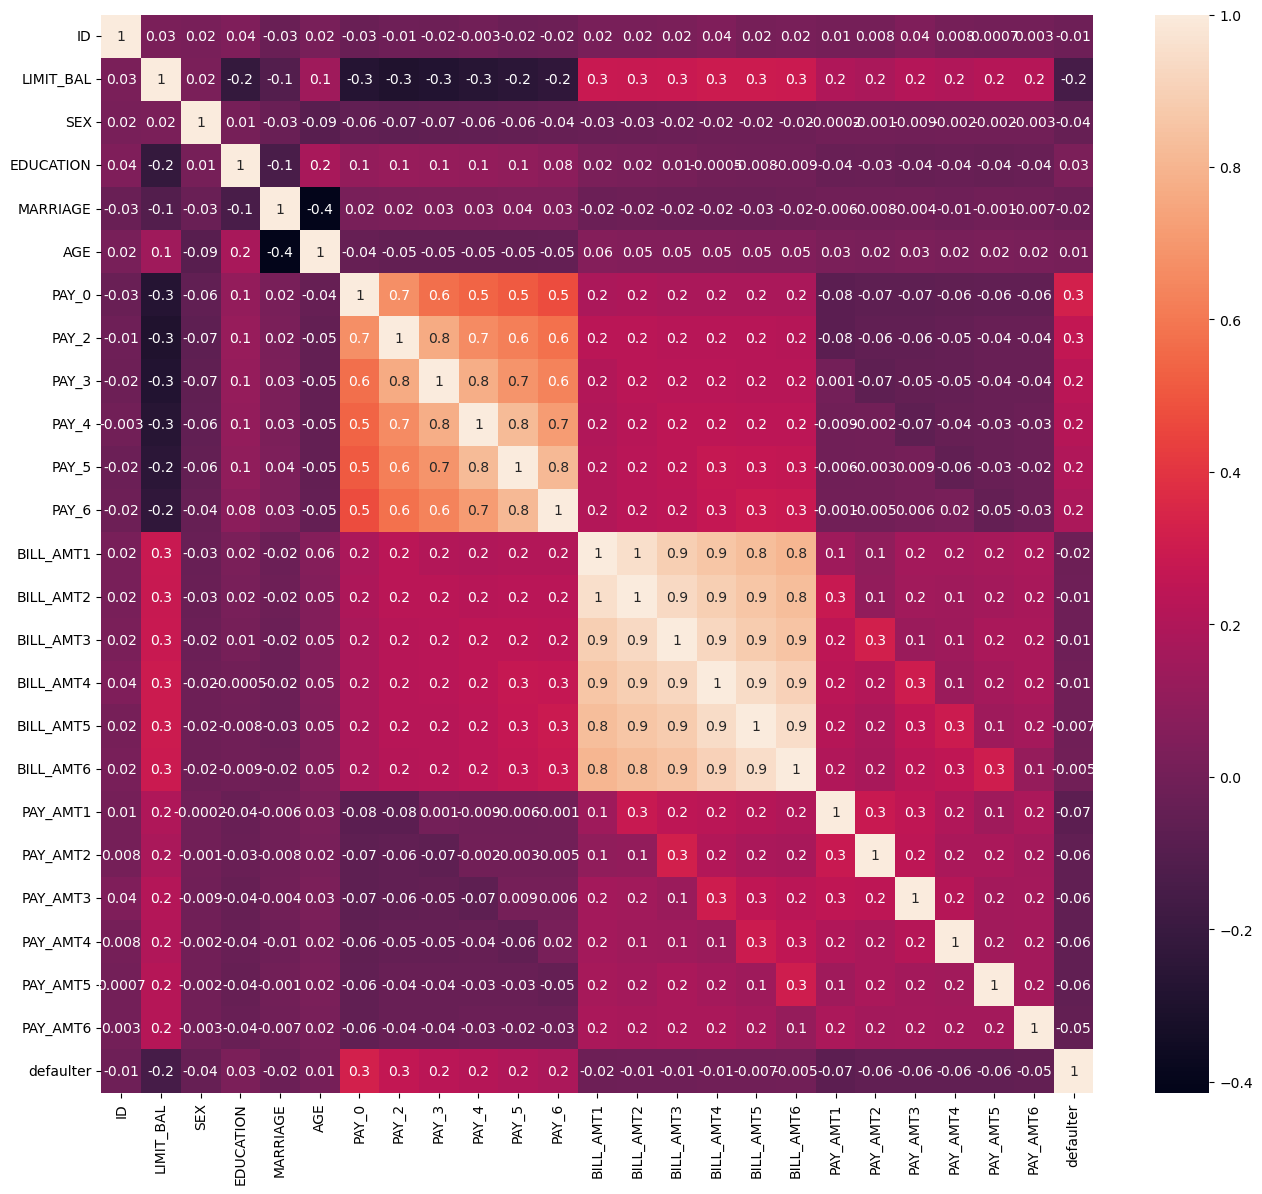

In [222]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(), annot=True, fmt='.1g')

## Data Modelling

In [223]:
x = df1.drop('defaulter', axis=1)
y = df1['defaulter']

In [224]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)
X_scaled

array([[-1.13672015,  0.81016074, -1.24601985, ..., -0.06416291,
        -0.0970632 , -0.04126615],
       [-0.3659805 ,  0.81016074, -1.02904717, ..., -0.06416291,
        -0.0970632 , -0.04126615],
       [-0.59720239,  0.81016074, -0.16115646, ..., -0.06416291,
        -0.0970632 , -0.04126615],
       ...,
       [-1.05964618, -1.23432296,  0.16430256, ..., -0.06416291,
        -0.0970632 , -0.04126615],
       [-0.67427636, -1.23432296,  0.59824792, ..., -0.06416291,
        -0.0970632 , -0.04126615],
       [-0.90549825, -1.23432296,  1.14067961, ..., -0.06416291,
        -0.0970632 , -0.04126615]])

In [225]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2)

In [226]:
bnb = BernoulliNB()

In [227]:
bnb.fit(x_train, y_train)
y_pred_bnb = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(classification_report(y_test, y_pred_bnb))

0.6653333333333333
[[3418 1246]
 [ 762  574]]
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      4664
           1       0.32      0.43      0.36      1336

    accuracy                           0.67      6000
   macro avg       0.57      0.58      0.57      6000
weighted avg       0.71      0.67      0.68      6000



In [228]:
lgr = LogisticRegression(class_weight='balanced')

In [229]:
lgr.fit(x_train, y_train)
y_pred_lgr = lgr.predict(x_test)
print(accuracy_score(y_test, y_pred_lgr))
print(confusion_matrix(y_test, y_pred_lgr))
print(classification_report(y_test, y_pred_lgr))

0.6785
[[3187 1477]
 [ 452  884]]
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      4664
           1       0.37      0.66      0.48      1336

    accuracy                           0.68      6000
   macro avg       0.63      0.67      0.62      6000
weighted avg       0.76      0.68      0.70      6000



In [230]:
dt = DecisionTreeClassifier()

In [231]:
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print(accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

0.7198333333333333
[[3787  877]
 [ 804  532]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      4664
           1       0.38      0.40      0.39      1336

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.72      0.72      6000



In [232]:
rf = RandomForestClassifier()

In [233]:
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

0.8163333333333334
[[4405  259]
 [ 843  493]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4664
           1       0.66      0.37      0.47      1336

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [234]:
xgb = XGBClassifier(class_weight='balanced')

In [235]:
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
print(accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

D:\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:41:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


0.8106666666666666
[[4391  273]
 [ 863  473]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4664
           1       0.63      0.35      0.45      1336

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



In [236]:
lr = DecisionTreeRegressor()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
y_pred_lr

array([0., 0., 1., ..., 0., 0., 0.])

In [237]:
np.mean(y_pred_lr)

0.24052777777777778

In [238]:
y_pred_lr_class=[]
for pred in y_pred_lr:
    if pred>=0.5:
        y_pred_lr_class.append(1)
    else:
        y_pred_lr_class.append(0)

In [239]:
print(confusion_matrix(y_test,y_pred_lr_class))

[[3755  909]
 [ 800  536]]


In [240]:
print(classification_report(y_test,y_pred_lr_class))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      4664
           1       0.37      0.40      0.39      1336

    accuracy                           0.72      6000
   macro avg       0.60      0.60      0.60      6000
weighted avg       0.72      0.72      0.72      6000



In [241]:
mlpc = MLPClassifier()

In [242]:
mlpc.fit(x_train, y_train)
y_pred_mlpc = mlpc.predict(x_test)
print(accuracy_score(y_test, y_pred_mlpc))
print(confusion_matrix(y_test, y_pred_mlpc))
print(classification_report(y_test, y_pred_mlpc))

0.8106666666666666
[[4367  297]
 [ 839  497]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      4664
           1       0.63      0.37      0.47      1336

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.68      6000
weighted avg       0.79      0.81      0.79      6000



D:\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [243]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.7906666666666666
[[4294  370]
 [ 886  450]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      4664
           1       0.55      0.34      0.42      1336

    accuracy                           0.79      6000
   macro avg       0.69      0.63      0.64      6000
weighted avg       0.77      0.79      0.77      6000



## Results 

In [244]:
f1_scores = []
y_pred = [y_pred_lgr, y_pred_dt, y_pred_rf, y_pred_xgb, y_pred_mlpc, y_pred_lr_class, y_pred_knn]
for pred in y_pred:
    f1_scores.append(f1_score(y_test,pred, average=None))

In [245]:
accuracy_scores = []
y_pred = [y_pred_lgr, y_pred_dt, y_pred_rf, y_pred_xgb, y_pred_mlpc, y_pred_lr_class, y_pred_knn]
for pred in y_pred:
    accuracy_scores.append(accuracy_score(y_test,pred))

In [246]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGboost', 'Multi-Layer Perceptron', 'Linear Regression', 'KNN']

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


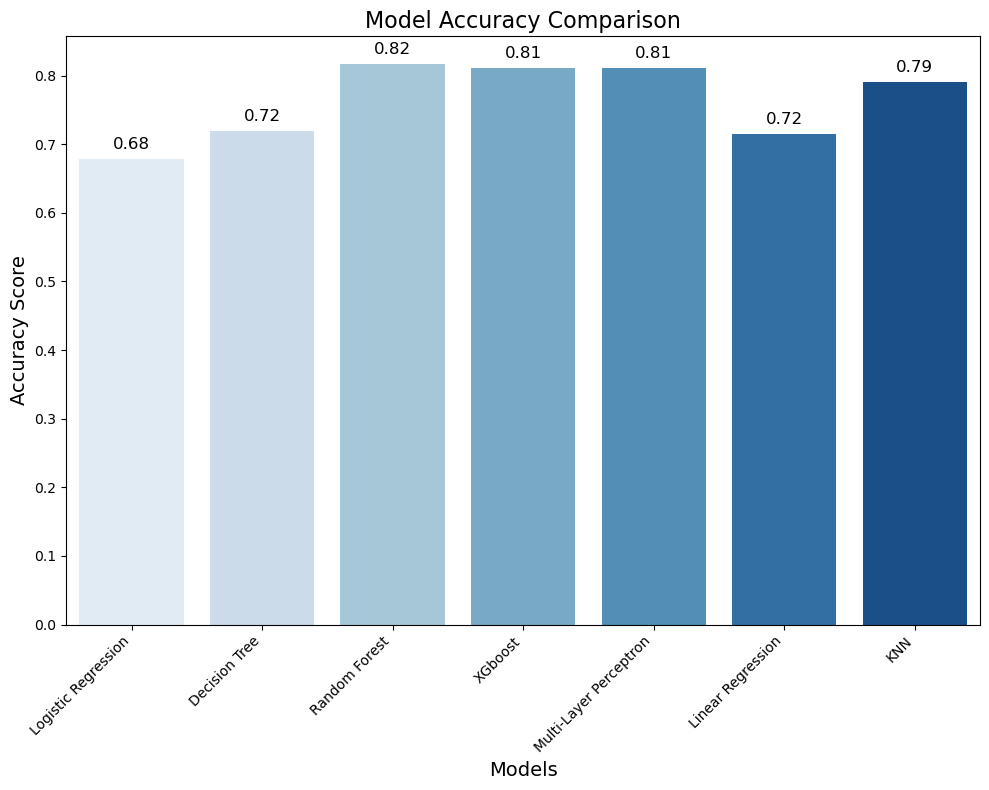

In [247]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=models, y=accuracy_scores, palette='Blues')

# Add value annotations on top of each bar
for i, score in enumerate(accuracy_scores):
    ax.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=12)

# Set the title and axis labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)

# Rotate x-axis labels if needed (e.g., if model names are long)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

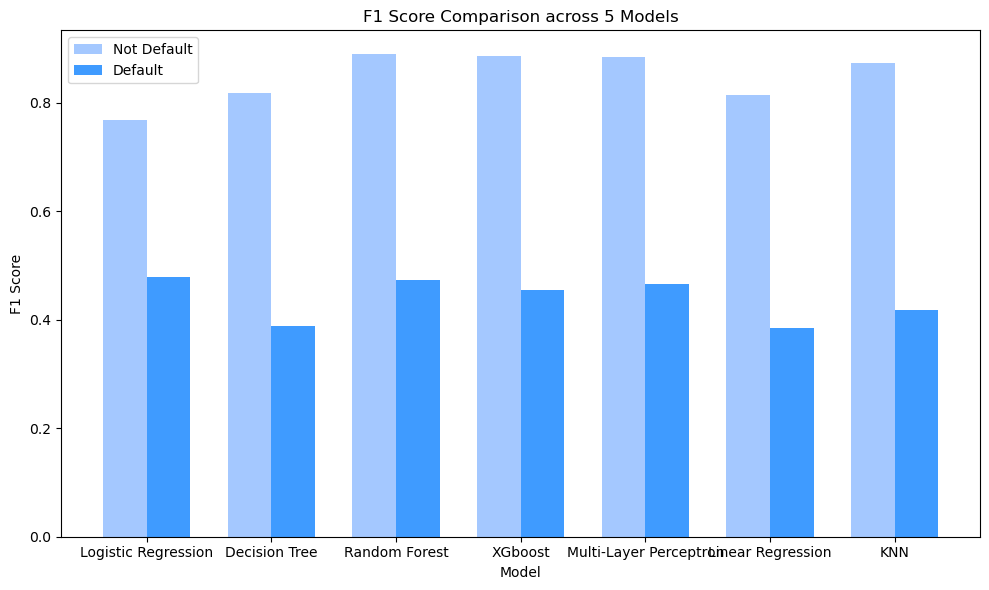

In [248]:
classes=['yes','No']
# Number of models
n_models = len(f1_scores)

# Set up bar positions
ind = range(n_models)  # the x locations for the groups
width = 0.35  # the width of the bars

colors = ['#A4C8FF','#3F9BFF']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for each class (Class 1 and Class 2)
bars1 = ax.bar([i - width / 2 for i in ind], [f1_scores[i][0] for i in ind], width, label='Not Default', color=colors[0])
bars2 = ax.bar([i + width / 2 for i in ind], [f1_scores[i][1] for i in ind], width, label='Default', color=colors[1])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score Comparison across 5 Models')
ax.set_xticks(ind)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()